<a href="https://colab.research.google.com/github/Er-uttam/3D-Effect-scrolling-website-/blob/main/Salary_data_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries


In [ ]:
### IMPORT: ------------------------------------
import scipy.stats as stats #It has all the probability distributions available along with many statistical functions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
# sns.set(style="darkgrid") # set the background for the graphs
# from scipy.stats import skew

# Read and Understand Data

In [ ]:
#Reading the csv file salary.csv
df = pd.read_csv('/content/Salary Data.csv')
insured=df.copy()

In [ ]:
# inspect data, print top 5
insured.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# bottom 5 rows:
insured.tail(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [ ]:
insured.info()    #it give information about datatype of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
insured.shape
#get the size of dataframe
print ("Rows     : " , insured.shape[0])
print ("Columns  : " , insured.shape[1])


Rows     :  375
Columns  :  6


In [ ]:
insured.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
insured.isnull().sum().values.sum()

12

In [ ]:
# insured[insured['Gender'] == '']

In [ ]:
insured = insured.dropna()

In [ ]:
insured.shape

(373, 6)

In [ ]:
print ("\nValues : \n", insured.values)
print ("\nFeatures : \n", list(insured.columns))
# print ("\nFeatures : \n", list(insured.columns.to_list()))

# print ("\nMissing values :  ", insured.isnull().sum().values.sum())

# print ("\nUnique values :  \n", insured.nunique())



Values : 
 [[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0 90000.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0 65000.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0 150000.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0 40000.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0 90000.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0 150000.0]]

Features : 
 ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [ ]:
insured.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [ ]:
#changing object dtype to category  to save memory
insured['Gender']=insured['Gender'].astype("category")
insured['Education Level']=insured['Education Level'].astype("category")
insured['Job Title']=insured['Job Title'].astype("category")


In [ ]:
insured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  373 non-null    float64 
 1   Gender               373 non-null    category
 2   Education Level      373 non-null    category
 3   Job Title            373 non-null    category
 4   Years of Experience  373 non-null    float64 
 5   Salary               373 non-null    float64 
dtypes: category(3), float64(3)
memory usage: 18.8 KB


In [ ]:
insured.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
insured.select_dtypes(['category']).columns

Index(['Gender', 'Education Level', 'Job Title'], dtype='object')

In [ ]:
# get counts of unique observations for each category variable
list_col=  insured[insured.select_dtypes(['category']).columns]
list_col

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
370,Female,Bachelor's,Senior Marketing Analyst
371,Male,Master's,Director of Operations
372,Female,Bachelor's,Junior Project Manager
373,Male,Bachelor's,Senior Operations Coordinator


In [ ]:
# Count data

In [ ]:
insured['Gender'].value_counts()

Gender
Male      194
Female    179
Name: count, dtype: int64

In [ ]:
insured['Education Level'].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [ ]:
dict(insured['Education Level'].value_counts())

{"Bachelor's": 224, "Master's": 98, 'PhD': 51}

In [ ]:
insured['Job Title'].value_counts()

Job Title
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: count, Length: 174, dtype: int64

In [ ]:
list_col = insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
    print(insured[list_col[i]].value_counts())

Gender
Male      194
Female    179
Name: count, dtype: int64
Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64
Job Title
Director of Marketing                 12
Director of Operations                11
Senior Business Analyst               10
Senior Marketing Analyst               9
Senior Marketing Manager               9
                                      ..
Junior Designer                        1
Junior Data Scientist                  1
Junior Data Analyst                    1
Junior Customer Support Specialist     1
Web Developer                          1
Name: count, Length: 174, dtype: int64


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# # Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

In [ ]:
len(insured[insured['Gender'] == 'Female'])

179

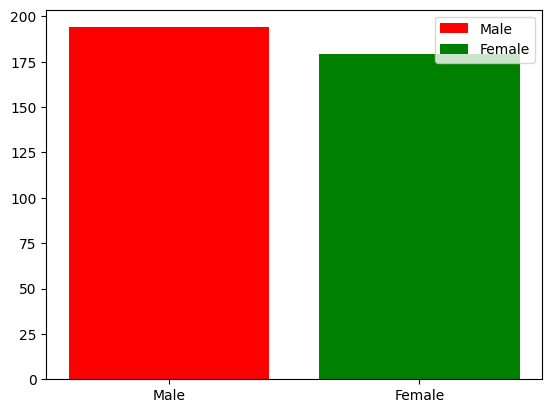

In [ ]:
no_of_male = len(insured[insured['Gender'] == 'Male'])
no_of_female = len(insured[insured['Gender'] == 'Female'])

plt.bar(['Male','Female'],[no_of_male,no_of_female],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

{'Male': 194, 'Female': 179}


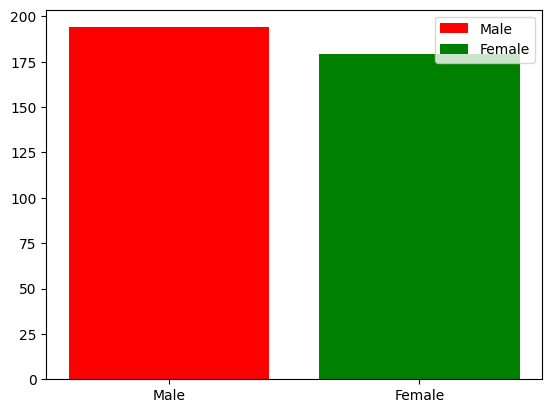

In [ ]:
plot_data = dict(insured['Gender'].value_counts())
print(plot_data)
plt.bar(['Male','Female'],[plot_data['Male'],plot_data['Female']],color = ['r','g'],label = ['Male','Female'])
plt.legend()
plt.show()

<Axes: xlabel='Gender'>

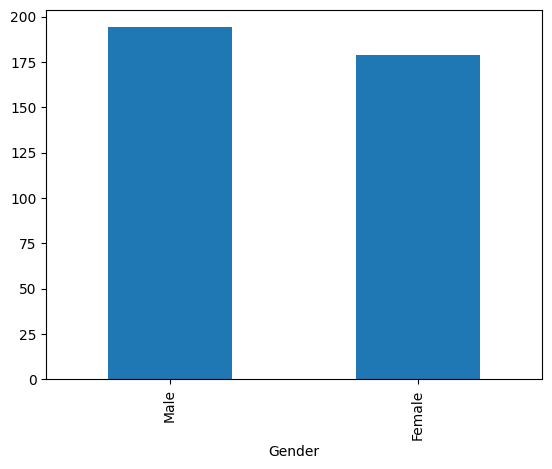

In [ ]:
insured['Gender'].value_counts().plot.bar()

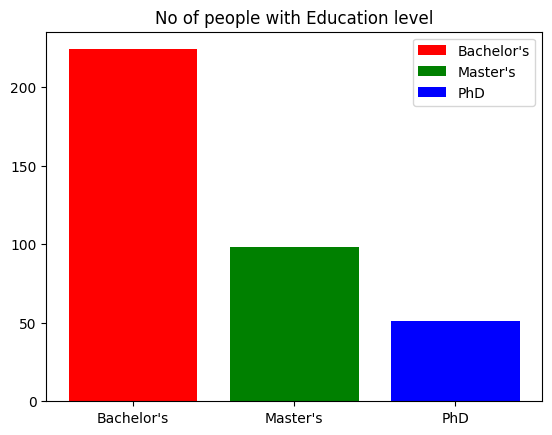

In [ ]:
#Alternet
#for education level
no_of_bach = len(insured[insured['Education Level'] == "Bachelor's"])
no_of_mast = len(insured[insured['Education Level'] == "Master's"])
no_of_phd = len(insured[insured['Education Level'] == 'PhD'])

plt.bar(["Bachelor's","Master's","PhD"],[no_of_bach,no_of_mast,no_of_phd], color = ['r','g','b'], label=["Bachelor's","Master's","PhD"])
plt.title('No of people with Education level')
plt.legend()
plt.show()

In [ ]:
plot_data.keys()

dict_keys(['Male', 'Female'])

In [ ]:
plot_data.values()

dict_values([194, 179])

{"Bachelor's": 224, "Master's": 98, 'PhD': 51}


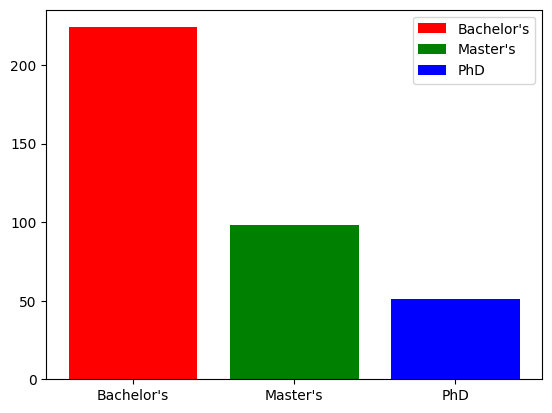

In [ ]:
plot_data = dict(insured['Education Level'].value_counts())
print(plot_data)
plt.bar(plot_data.keys(),plot_data.values(),color = ['r','g','b'],label = plot_data.keys())
plt.legend()
plt.show()
# plot_data
# plot_data.keys()

<Axes: xlabel='Education Level'>

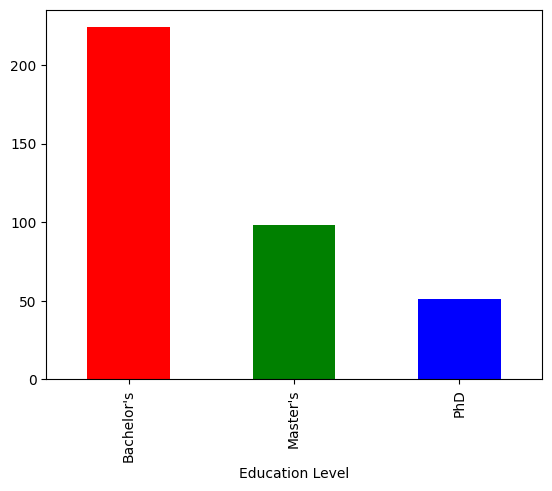

In [ ]:
insured['Education Level'].value_counts().plot.bar(color = ['r','g','b'])

<Axes: ylabel='count'>

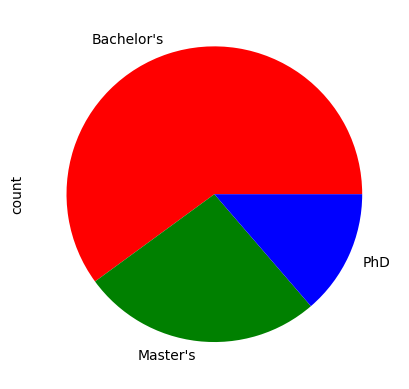

In [ ]:
insured['Education Level'].value_counts().plot.pie(colors = ['r','g','b'])

In [ ]:
len(set(insured['Job Title']))

174

<Axes: xlabel='Job Title'>

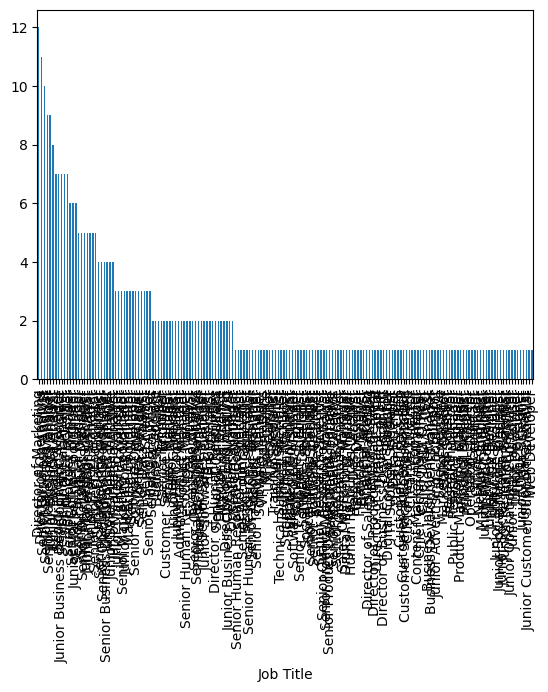

In [ ]:
insured['Job Title'].value_counts().plot.bar()

In [ ]:
# Analyzing categorical data

In [ ]:
# list_col=  insured.select_dtypes(['category']).columns
# print(list_col)
# plot_data2 = dict(insured['Gender'].value_counts())
# insured[list_col[2]].value_counts()

# plot_data1 = dict(insured['Education Level'].value_counts())

# plot_data3 = dict(insured['Job Title'].value_counts())


In [ ]:
data = {}
list_col=  insured.select_dtypes(['category']).columns
for i in range(len(list_col)):
  values = list(insured[list_col[i]].value_counts())
  subcategory = list(insured[list_col[i]].value_counts().index)
  # data['x'] = values
  data[list_col[i]] = [subcategory,values]
  # print(subcategory,values)

print(data)

{'Gender': [['Male', 'Female'], [194, 179]], 'Education Level': [["Bachelor's", "Master's", 'PhD'], [224, 98, 51]], 'Job Title': [['Director of Marketing', 'Director of Operations', 'Senior Business Analyst', 'Senior Marketing Analyst', 'Senior Marketing Manager', 'Junior Business Analyst', 'Junior Financial Analyst', 'Senior Project Manager', 'Junior Business Development Associate', 'Senior Financial Analyst', 'Senior Data Scientist', 'Senior Product Manager', 'Senior Software Engineer', 'Junior Marketing Coordinator', 'Senior Financial Manager', 'Senior Product Designer', 'Senior Operations Manager', 'Junior Marketing Specialist', 'Junior Operations Analyst', 'Junior Project Manager', 'Senior Project Coordinator', 'Senior Data Engineer', 'Senior Marketing Specialist', 'Senior Operations Coordinator', 'Senior Business Development Manager', 'Junior Product Manager', 'Junior Sales Representative', 'Junior Marketing Analyst', 'Junior Marketing Manager', 'Junior Accountant', 'Senior Marke

In [ ]:
# Bar Graph

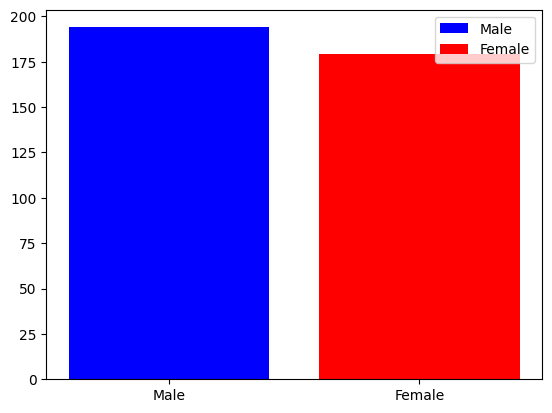

In [ ]:
plt.bar(data['Gender'][0],data['Gender'][1],label=['Male','Female'],
        color = ['b','r'])
plt.legend()
plt.show()

In [ ]:
# #Alternate
# print(data['region'])
# plt.bar(data['region'][0],data['region'][1],
#         label=['southeast', 'northwest', 'southwest', 'northeast'],
#         color = ['r','b','g','k'])
# plt.title('Region')
# plt.legend()
# plt.show()

[["Bachelor's", "Master's", 'PhD'], [224, 98, 51]]


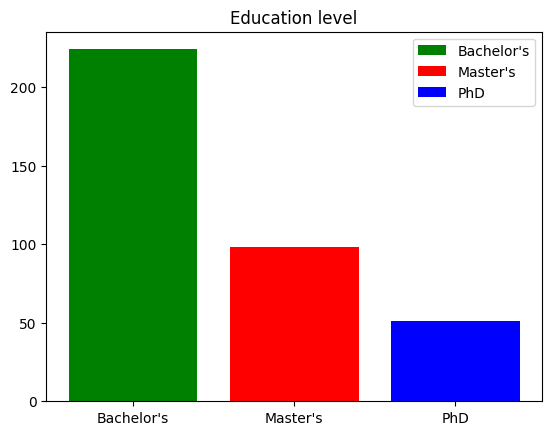

In [ ]:
#Alternate
print(data['Education Level'])
plt.bar(data['Education Level'][0],data['Education Level'][1],
        label=data['Education Level'][0],
        color = ['g','r','b'])
plt.title('Education level')
plt.legend()
plt.show()

## Bivariate & Multivariate Analysis

In [ ]:
insured

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
corr_insured = insured[['Age','Years of Experience','Salary']]

In [ ]:
corr_insured.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


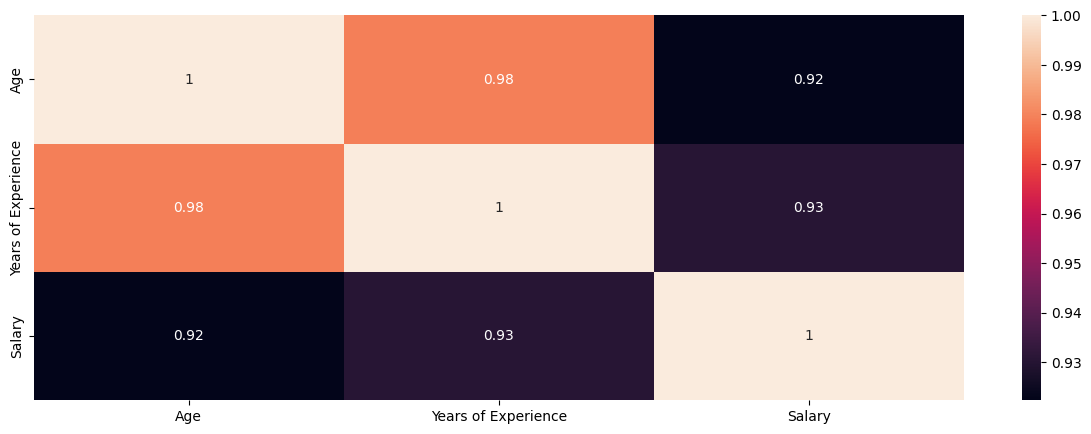

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(corr_insured.corr(),annot=True)
plt.show()

<Figure size 500x500 with 0 Axes>

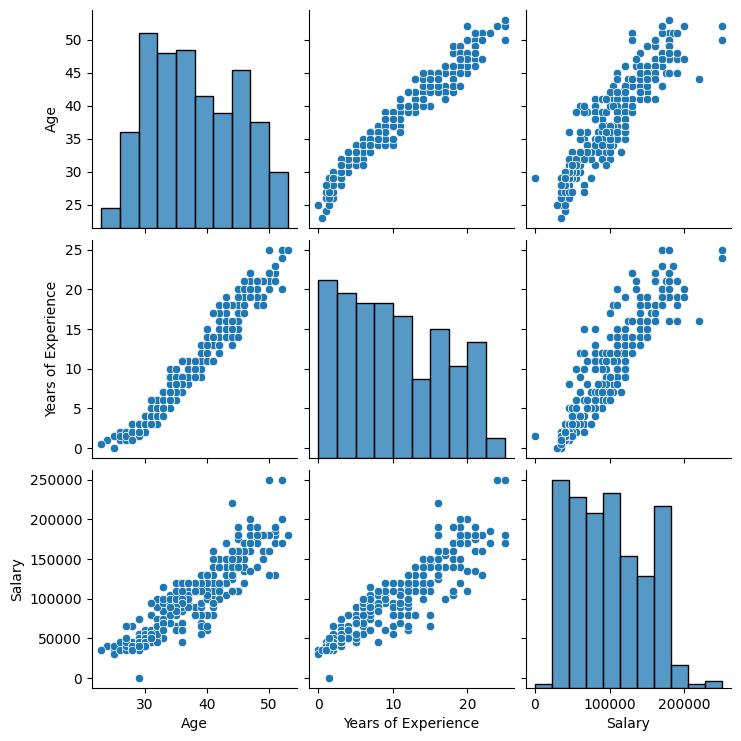

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(data=insured)
plt.show()

<Axes: xlabel='Education Level', ylabel='count'>

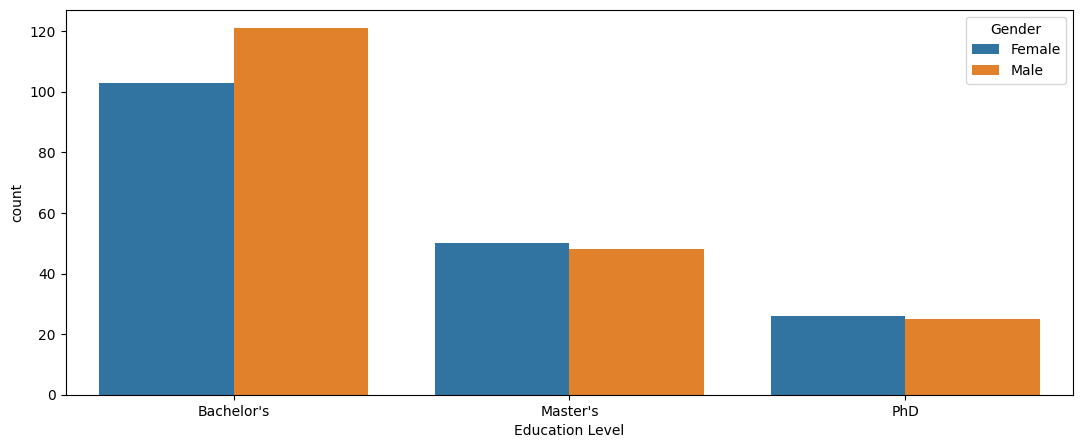

In [ ]:
#Gender count plot
plt.figure(figsize=(13,5))
sns.countplot(x='Education Level',hue='Gender',data=insured)
# bar_perc(ax,insured['Education Level'])

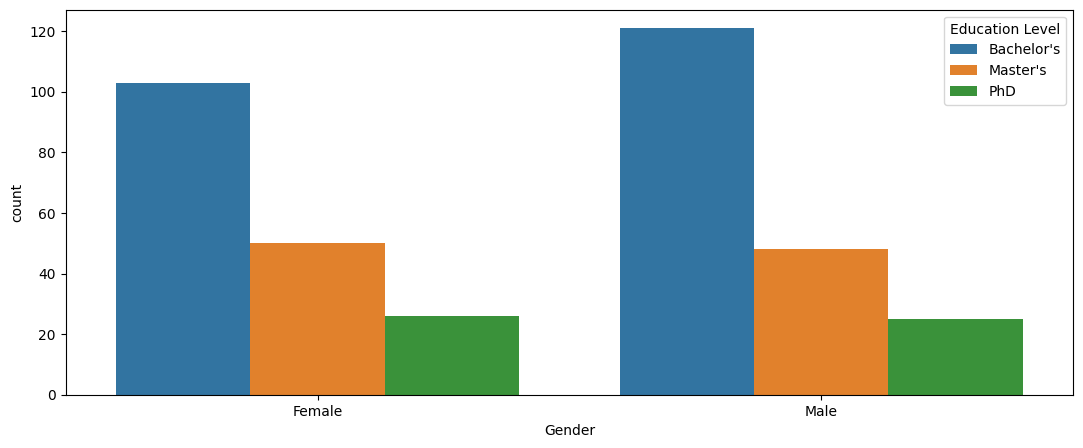

In [ ]:
#Sex vs Education Level
plt.figure(figsize=(13,5))
ax=sns.countplot(x='Gender',hue='Education Level',data=insured)
# bar_perc(ax,insured['Education Level'])

In [ ]:
#smoker vs charges
# sns.barplot(x=insured.smoker,y=insured.expenses).set(title="Smoker vs Charges")

In [ ]:
#region vs smoker
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x='region',hue='smoker',data=insured)
# bar_perc(ax,insured['smoker'])
# ax.set(title="Smoker vs Region")

In [ ]:
# #smoker vs region
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x='smoker',hue='region',data=insured)
# bar_perc(ax,insured['region'])
# ax.set(title="Smoker vs Region")

In [ ]:
# plt.figure(figsize=(13,5))
# ax=sns.countplot(x='region',hue='sex',data=insured,palette='spring')
# bar_perc(ax,insured['sex'])
# ax.set(title="Sex vs Region")

In [ ]:
insured.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
# GROUP BY

In [ ]:
insured.groupby(insured['Gender']).Salary.mean()    #GROUP BY BY Gender

Gender
Female     97011.173184
Male      103867.783505
Name: Salary, dtype: float64

<Axes: xlabel='Gender'>

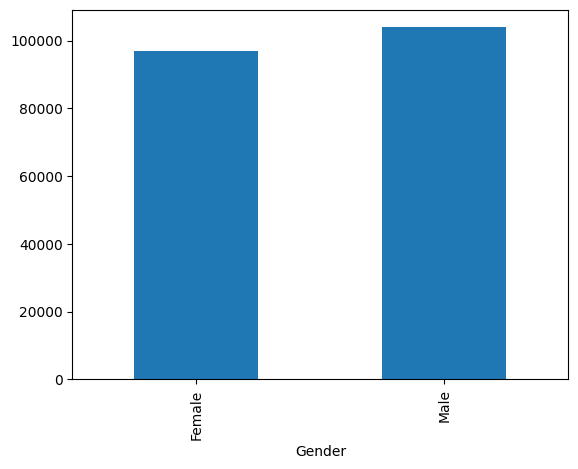

In [ ]:
insured.groupby(insured['Gender']).Salary.mean().plot.bar()    #GROUP BY BY Gender

In [ ]:
insured.groupby(insured['Education Level']).Salary.mean()     #GROUP BY BY Education Level

Education Level
Bachelor's     74756.026786
Master's      129795.918367
PhD           157843.137255
Name: Salary, dtype: float64

In [ ]:
#rename
insured.rename(columns = {'Years of Experience':'Years_of_Experience','Education Level':'Education_Level'}, inplace = True)

In [ ]:
insured

,Age,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
insured.groupby(insured['Education_Level']).Years_of_Experience.mean()      #GROUP BY BY Education Level

Education_Level
Bachelor's     6.966518
Master's      13.397959
PhD           17.019608
Name: Years_of_Experience, dtype: float64

In [ ]:
plot_data = dict(insured.groupby(insured['Education_Level']).Salary.mean())
plot_key = list(plot_data.keys())
plot_value = list(plot_data.values())
print(plot_key)
print(plot_value)
print(plot_data)

["Bachelor's", "Master's", 'PhD']
[74756.02678571429, 129795.91836734694, 157843.13725490196]
{"Bachelor's": 74756.02678571429, "Master's": 129795.91836734694, 'PhD': 157843.13725490196}


<Axes: xlabel='Education_Level'>

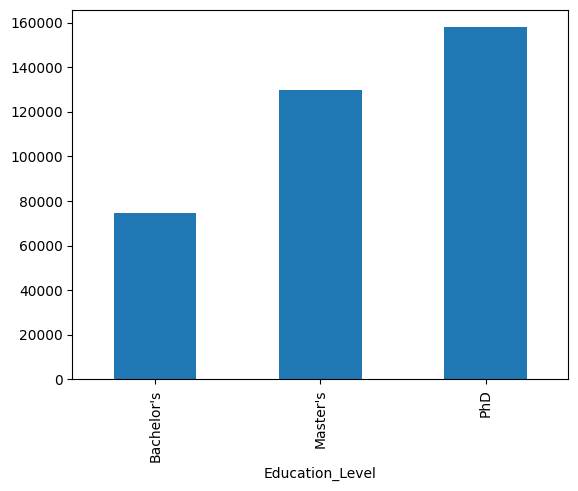

In [ ]:
insured.groupby(insured['Education_Level']).Salary.mean().plot.bar()

<Axes: xlabel='Education_Level'>

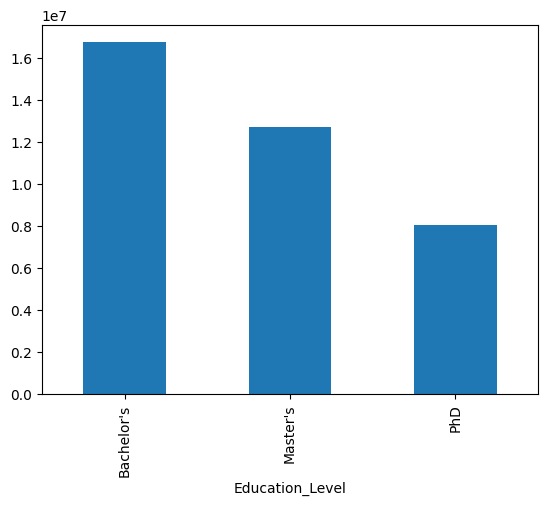

In [ ]:
insured.groupby(insured['Education_Level']).Salary.sum().plot.bar()

[Text(0.5, 1.0, 'Gender Vs Salary')]

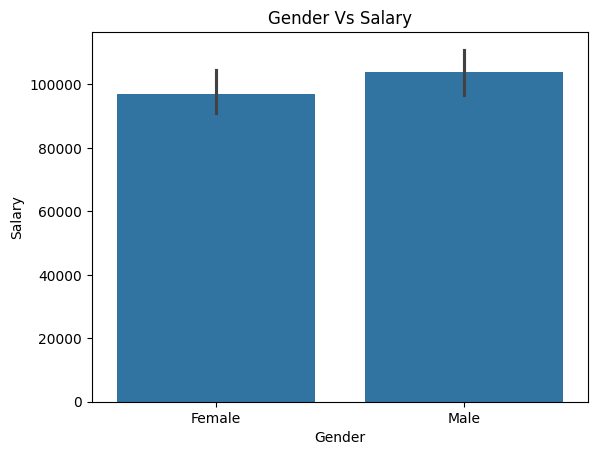

In [ ]:
_#Plot of Gender and Salary
sns.barplot(x=insured.Gender,y=insured.Salary).set(title='Gender Vs Salary')

[Text(0.5, 1.0, 'Education Level Vs Salary')]

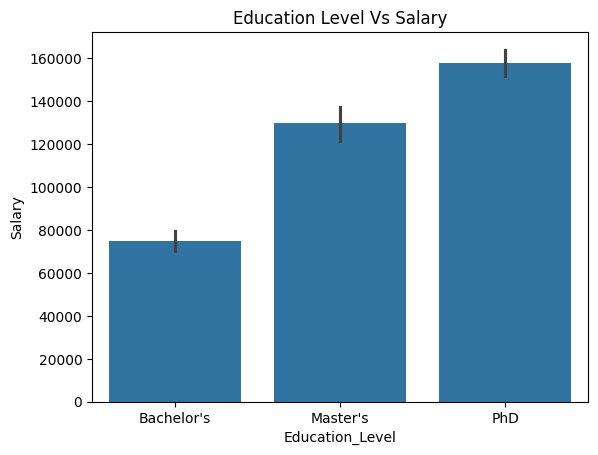

In [ ]:
sns.barplot(x=insured['Education_Level'],y=insured['Salary']).set(title='Education Level Vs Salary')

#multivariate


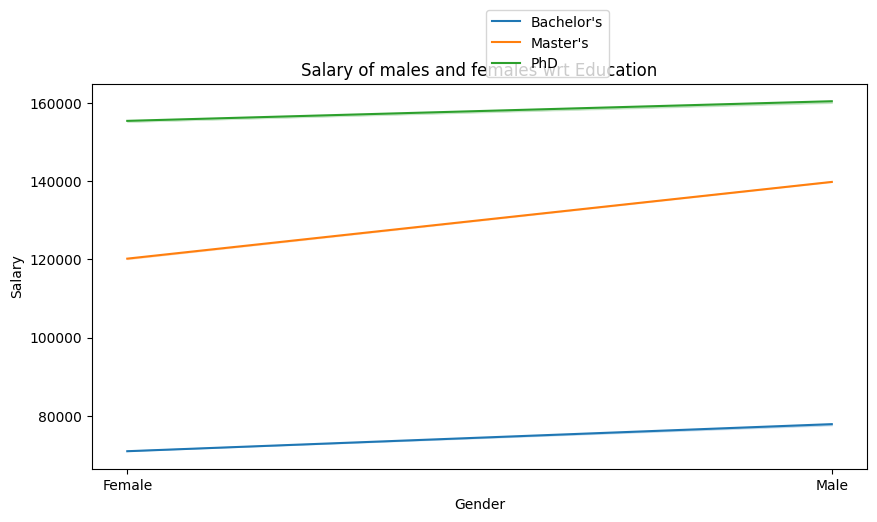

In [ ]:
#lineplot
plt.figure(figsize=(10,5))
sns.lineplot(x = insured["Gender"], y =insured["Salary"],hue=insured["Education_Level"],ci=1).set(title= 'Salary of males and females wrt Education')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

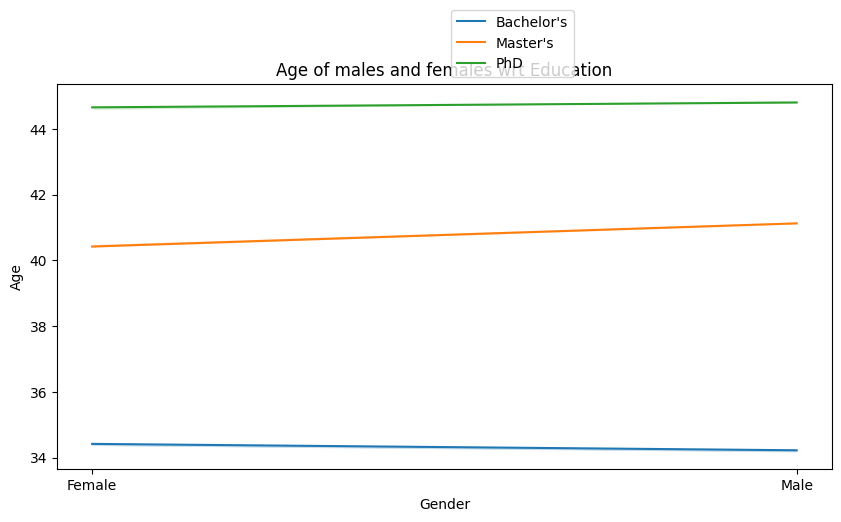

In [ ]:
#multivariate
plt.figure(figsize=(10,5))
sns.lineplot(x = insured["Gender"], y =insured["Age"],hue=insured["Education_Level"],ci=1).set(title= 'Age of males and females wrt Education')
plt.legend(bbox_to_anchor=(0.5, 1))
plt.show()

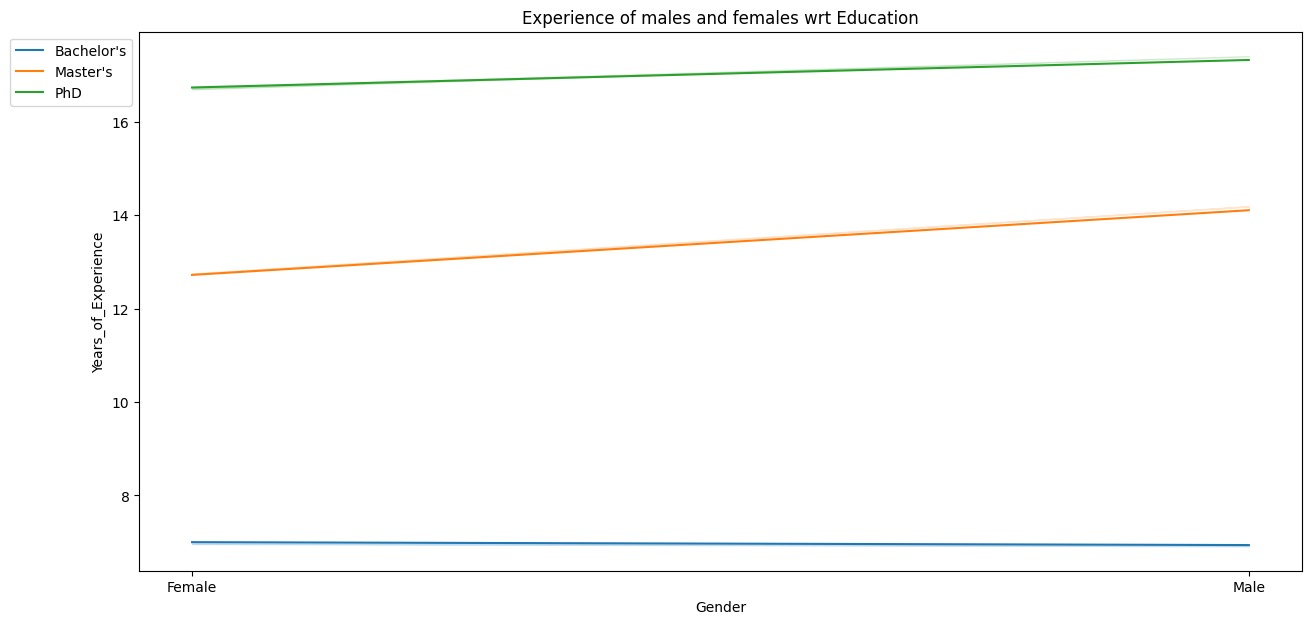

In [ ]:
#multivariate
plt.figure(figsize=(15,7))
sns.lineplot(x = insured["Gender"], y =insured["Years_of_Experience"],hue=insured["Education_Level"],ci=1).set(title= 'Experience of males and females wrt Education')
plt.legend(bbox_to_anchor=(0, 1))
plt.show()

#Cross tab

In [ ]:
#Cross tab
edu_gender_salary =pd.crosstab(index=insured['Education_Level'], columns=insured.Gender  , values = insured.Salary, aggfunc='mean')
edu_gender_salary


Gender,Female,Male
Education_Level,,
Bachelor's,71019.417476,77936.776860
Master's,120200.000000,139791.666667
PhD,155384.615385,160400.000000


In [ ]:
gender_edu_salary=pd.crosstab(index=insured.Gender, columns=insured['Education_Level']  , values=insured.Salary,aggfunc='sum')
gender_edu_salary

Education_Level,Bachelor's,Master's,PhD
Gender,,,
Female,7315000.0,6010000.0,4040000.0
Male,9430350.0,6710000.0,4010000.0


In [ ]:
# plot directly from dataframe

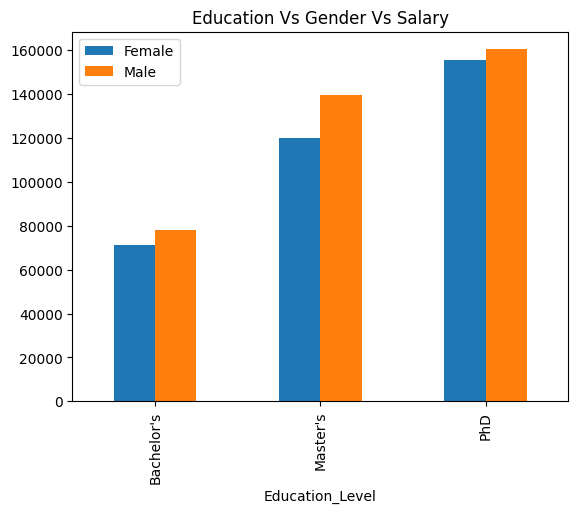

In [ ]:
edu_gender_salary.plot(kind='bar',title="Education Vs Gender Vs Salary")
plt.legend(loc='upper left')
plt.show()

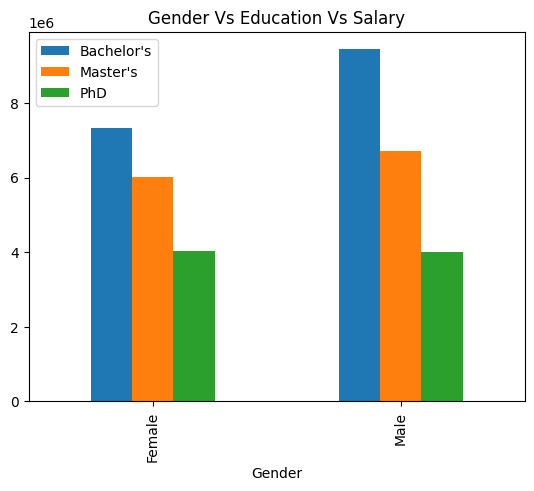

In [ ]:
gender_edu_salary.plot(kind='bar',title="Gender Vs Education Vs Salary")
plt.legend(loc='upper left')
plt.show()

In [ ]:
# converting quantitative data to qualitative
insured

,Age,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
insured.describe()

,Age,Years_of_Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
#creating groups of age
category = pd.cut(insured.Age,bins=[20,25,30,35,40,45,50,55,60],labels=['20-25','25-30','30-35','35-40','40-45','45-50','50-55','55-60'])
category

0      30-35
1      25-30
2      40-45
3      35-40
4      50-55
       ...  
370    30-35
371    40-45
372    25-30
373    30-35
374    40-45
Name: Age, Length: 373, dtype: category
Categories (8, object): ['20-25' < '25-30' < '30-35' < '35-40' < '40-45' < '45-50' < '50-55' < '55-60']

In [ ]:
insured.insert(1,'AgeGroup',category)

In [ ]:
insured

,Age,AgeGroup,Gender,Education_Level,Job Title,Years_of_Experience,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...,...
370,35.0,30-35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,40-45,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,25-30,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,30-35,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [ ]:
age_group = insured.groupby(insured.AgeGroup).Salary.mean()
age_group

AgeGroup
20-25     35833.333333
25-30     43288.805970
30-35     74375.000000
35-40     97222.222222
40-45    139315.068493
45-50    168700.000000
50-55    183888.888889
55-60              NaN
Name: Salary, dtype: float64

In [ ]:
category1=pd.cut(insured['Years_of_Experience'],bins=[0,5,10,15,20],labels=['0-5','5-10','10-15','15-20'])
insured.insert(6,'Exp_group',category1)

In [ ]:
insured.head()

,Age,AgeGroup,Gender,Education_Level,Job Title,Years_of_Experience,Exp_group,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,0-5,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,0-5,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,10-15,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,5-10,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,15-20,200000.0


In [ ]:
exp_group = insured.groupby(insured.Exp_group).Salary.mean()
exp_group

Exp_group
0-5       49367.372881
5-10      92578.947368
10-15    118230.769231
15-20    159140.625000
Name: Salary, dtype: float64

<Axes: title={'center': 'Agebins vs Avg Salary'}, xlabel='AgeGroup'>

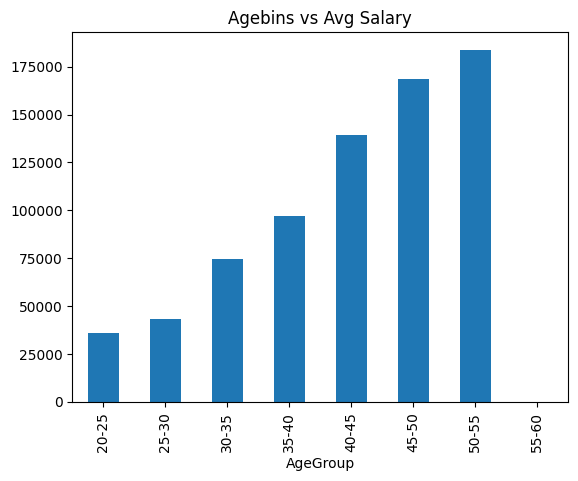

In [ ]:
age_group.plot(kind='bar',title="Agebins vs Avg Salary")


In [ ]:
Exp_bin_cat = insured.groupby(insured.Exp_group).Salary.mean()
Exp_bin_cat

Exp_group
0-5       49367.372881
5-10      92578.947368
10-15    118230.769231
15-20    159140.625000
Name: Salary, dtype: float64

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Exp_group'>

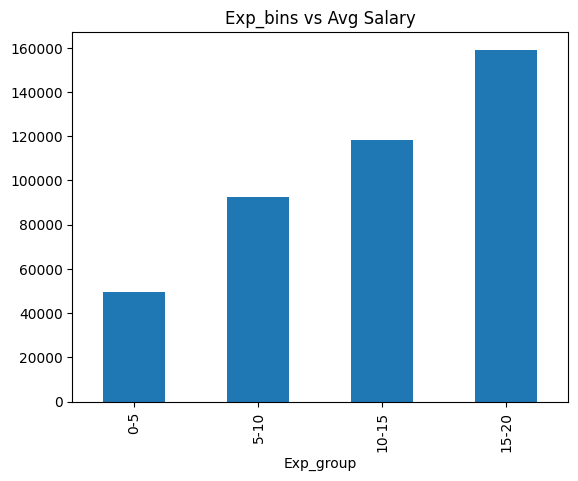

In [ ]:
Exp_bin_cat.plot(kind='bar',title="Exp_bins vs Avg Salary")


In [ ]:
#multi variate data analysis
insured.groupby(['Gender','Education_Level','Exp_group']).Salary.mean()

Gender  Education_Level  Exp_group
Female  Bachelor's       0-5           47040.816327
                         5-10          88225.806452
                         10-15         92941.176471
                         15-20        120000.000000
        Master's         0-5           58750.000000
                         5-10          93000.000000
                         10-15        115000.000000
                         15-20        170000.000000
        PhD              0-5                    NaN
                         5-10                   NaN
                         10-15        147727.272727
                         15-20        153636.363636
Male    Bachelor's       0-5           49158.474576
                         5-10          90833.333333
                         10-15        125384.615385
                         15-20        121875.000000
        Master's         0-5           75000.000000
                         5-10         102941.176471
                         10-1

In [ ]:
insured.groupby(['Gender','Education_Level','Exp_group']).Salary.mean().unstack()

Exp_group                        0-5           5-10          10-15  \
Gender Education_Level                                               
Female Bachelor's       47040.816327   88225.806452   92941.176471   
       Master's         58750.000000   93000.000000  115000.000000   
       PhD                       NaN            NaN  147727.272727   
Male   Bachelor's       49158.474576   90833.333333  125384.615385   
       Master's         75000.000000  102941.176471  126250.000000   
       PhD                       NaN  110000.000000  126250.000000   

Exp_group                       15-20  
Gender Education_Level                 
Female Bachelor's       120000.000000  
       Master's         170000.000000  
       PhD              153636.363636  
Male   Bachelor's       121875.000000  
       Master's         172750.000000  
       PhD              164333.333333

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Gender,Education_Level'>

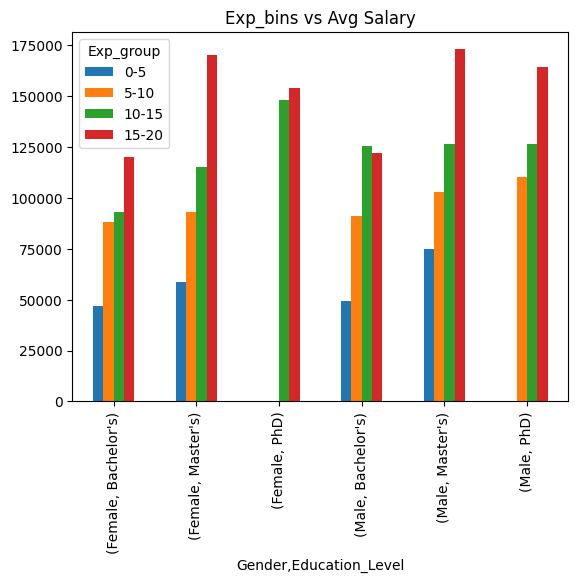

In [ ]:
insured.groupby(['Gender','Education_Level','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Gender,Education_Level,Exp_group'>

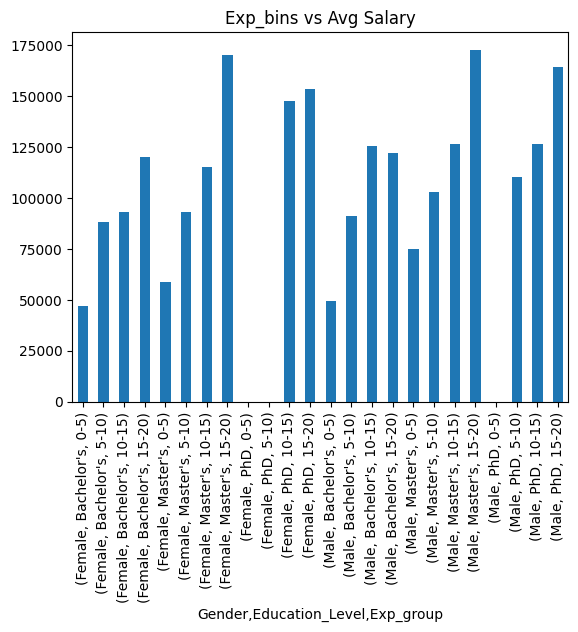

In [ ]:
insured.groupby(['Gender','Education_Level','Exp_group']).Salary.mean().plot(kind='bar',title="Exp_bins vs Avg Salary")

<Axes: title={'center': 'Exp_bins vs Avg Salary'}, xlabel='Education_Level,Gender'>

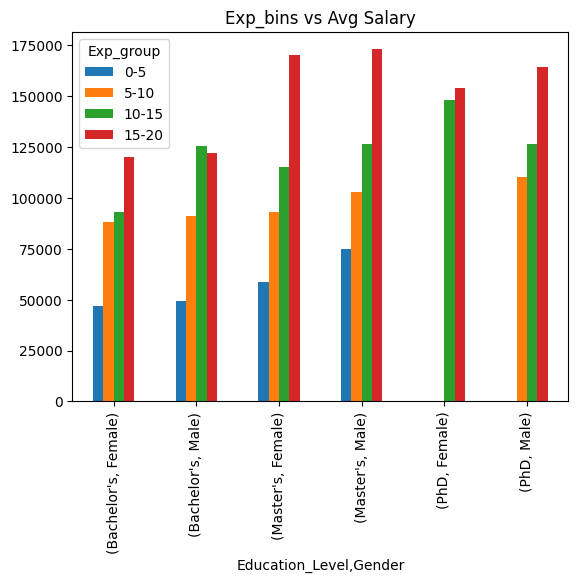

In [ ]:
insured.groupby(['Education_Level','Gender','Exp_group']).Salary.mean().unstack().plot(kind='bar',title="Exp_bins vs Avg Salary")

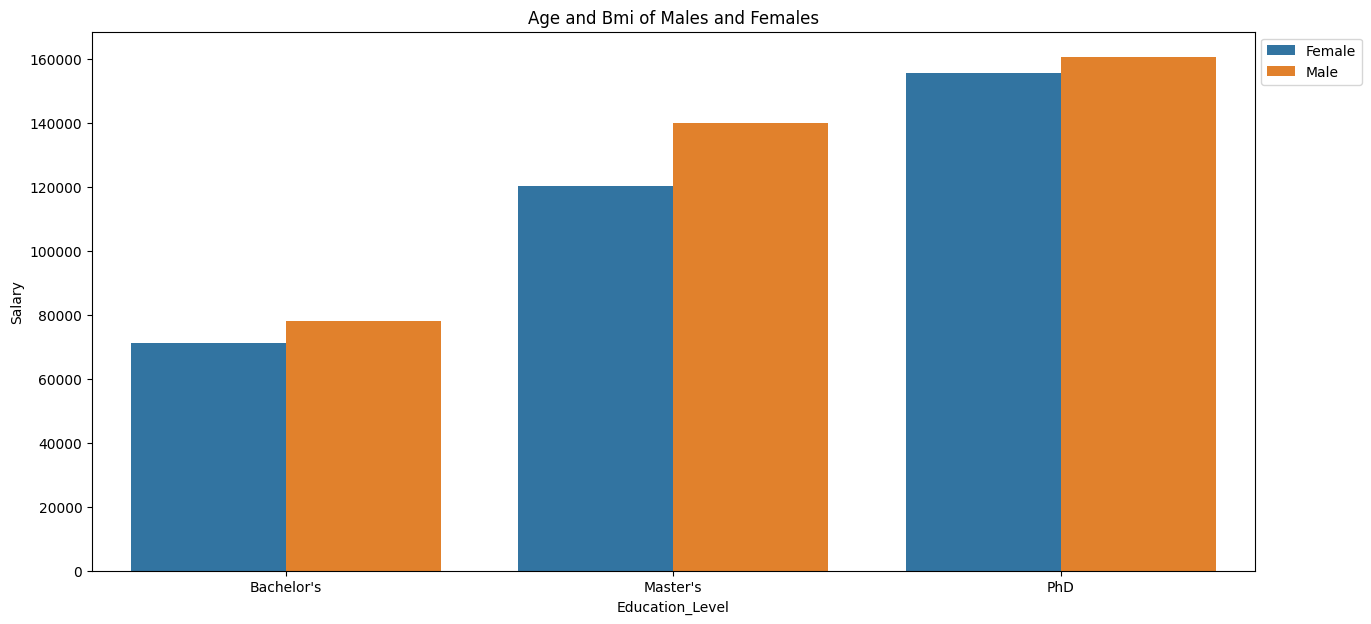

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=insured["Education_Level"],y=insured["Salary"],hue=insured['Gender'],ci=0).set(title= 'Age and Bmi of Males and Females')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

[Text(0.5, 1.0, 'Education level vs Experience vs Gender')]

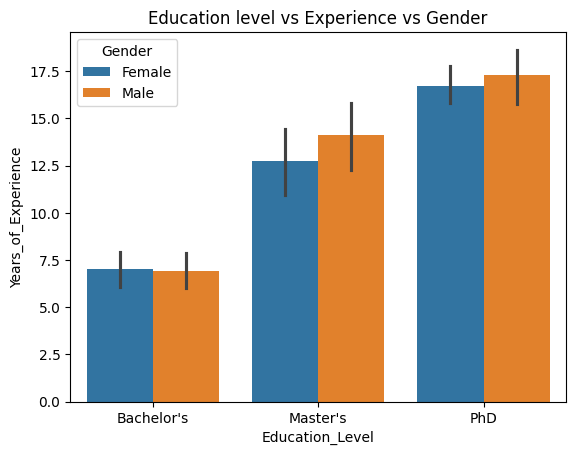

In [ ]:
sns.barplot(x='Education_Level',y='Years_of_Experience',hue='Gender',data=insured).set(title="Education level vs Experience vs Gender" )

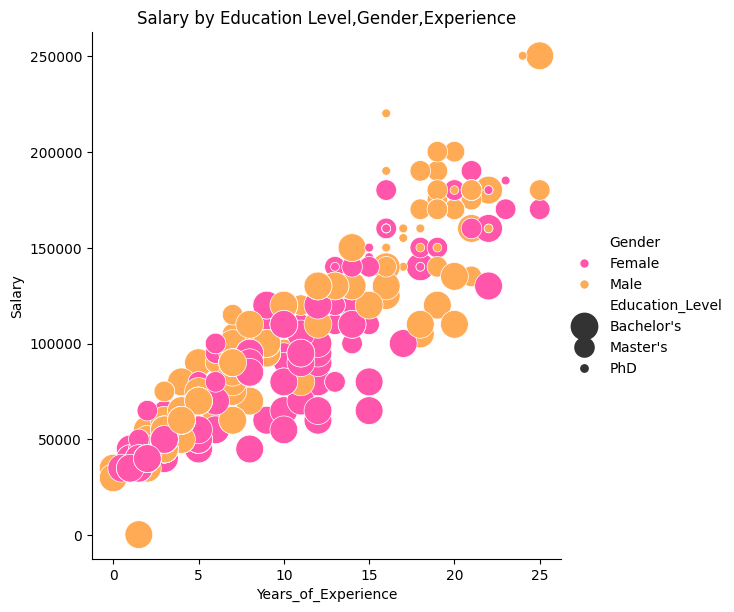

In [ ]:
sns.relplot(x=insured['Years_of_Experience'], y=insured["Salary"], hue=insured['Gender'], size=  insured['Education_Level'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

In [ ]:
insured

,Age,AgeGroup,Gender,Education_Level,Job Title,Years_of_Experience,Exp_group,Salary
0,32.0,30-35,Male,Bachelor's,Software Engineer,5.0,0-5,90000.0
1,28.0,25-30,Female,Master's,Data Analyst,3.0,0-5,65000.0
2,45.0,40-45,Male,PhD,Senior Manager,15.0,10-15,150000.0
3,36.0,35-40,Female,Bachelor's,Sales Associate,7.0,5-10,60000.0
4,52.0,50-55,Male,Master's,Director,20.0,15-20,200000.0
...,...,...,...,...,...,...,...,...
370,35.0,30-35,Female,Bachelor's,Senior Marketing Analyst,8.0,5-10,85000.0
371,43.0,40-45,Male,Master's,Director of Operations,19.0,15-20,170000.0
372,29.0,25-30,Female,Bachelor's,Junior Project Manager,2.0,0-5,40000.0
373,34.0,30-35,Male,Bachelor's,Senior Operations Coordinator,7.0,5-10,90000.0


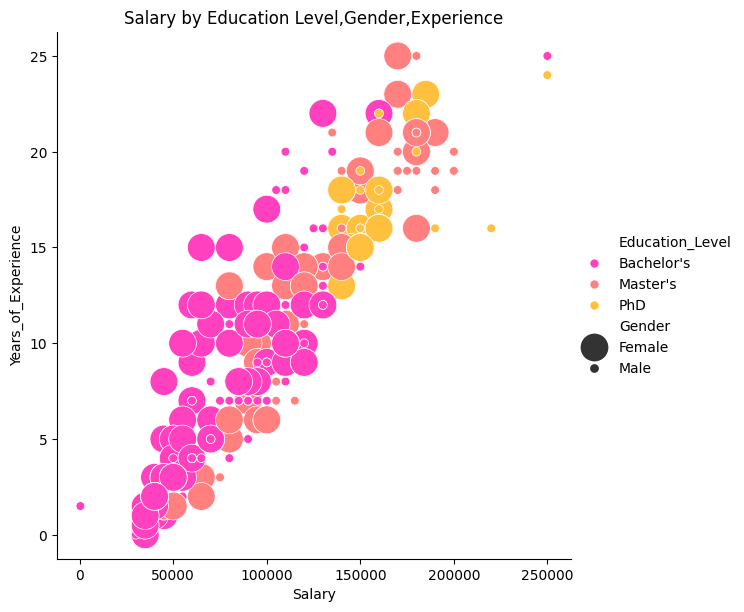

In [ ]:
sns.relplot(x=insured['Salary'], y=insured['Years_of_Experience'], hue=insured['Education_Level'], size=  insured['Gender'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

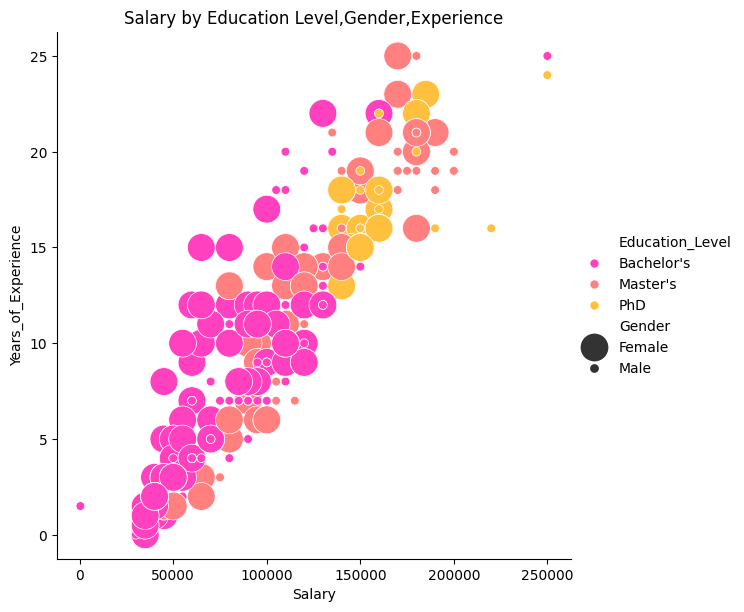

In [ ]:
sns.relplot(x=insured['Salary'], y=insured['Years_of_Experience'], hue=insured['Education_Level'], size=  insured['Gender'],
            sizes=(40, 400), palette="spring",
            height=6, data=insured).set(title='Salary by Education Level,Gender,Experience');

# Statistical Analysis

# 1.Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

<div class ="alert alert-block alert-info">

---


    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  :  \mu_1 <= \mu_2  $ The average charges of smokers is less than or equal to nonsmokers
 <br>


$\ H_a  :\mu_1 > \mu_2 $ The average charges of smokers is greater than nonsmokers  <br>
</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level. If P values is less than alpha reject the null hypothesis.</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3: Identify the test</b></font>

Standard deviation of the population is not known  ,will perform a T stat test .  The > sign in alternate hypothesis indicate  test is right tailed, that is all z values that would cause us to reject null hypothesis are in just one tail to the right of  sampling  distribution curve.

    


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
import pandas as pd
insured = pd.read_csv('/content/insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/insurance.csv'

In [ ]:
smoker=insured.loc[insured.smoker=="yes"]
smoker.head()

In [ ]:
len(smoker)

In [ ]:
nonsmoker=insured.loc[insured.smoker=='no']
nonsmoker.head()

In [ ]:
len(nonsmoker)

In [ ]:
# Adjusting the size of the rows to be equal
nonsmoker = nonsmoker[0:274]
charges_yes = smoker.expenses
charges_no = nonsmoker.expenses

In [ ]:
print(f'Average Cost charged to Insurance for smoker is {charges_yes.mean()} and nonsmoker is {charges_no.mean()} ')


In [ ]:
# #smoker vs charges
# sns.boxplot(x=insured.expenses,y=insured.smoker,data=insured).set(title="Fig:1 Smoker vs Charges")

In [ ]:
# charges_no

In [ ]:
stats.ttest_ind(charges_yes, charges_no)

In [ ]:
alpha = 0.05
t_statistic_1, p_value_1 = stats.ttest_ind(charges_yes, charges_no)
p_value_onetail=p_value_1/2

print("Test statistic = {} , Pvalue ={} , OnetailPvalue = {}".format(t_statistic_1,p_value_1, p_value_onetail ))


In [ ]:
if p_value_1 < alpha :
    print(f"Conclusion:Since P value {p_value_onetail} is less than alpha {alpha} " )
    # print("Reject Null Hypothesis that Average charges for smokers are less than or equal to nonsmoker.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_onetail,alpha))
    # print("Failed to Reject Null Hypothesis that Average charges for smokers are less than nonsmoker.")

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide whethere to  reject or failed to reject null hypothesis</b></font><br>    
    We reject the null hypothesis and can conclude that people who smoke have on an average larger medical claim compared to people who don't smoke. Similar result can also been seen in Fig no.1 Smokers Vs Charges

# 2.Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

<div class ="alert alert-block alert-info">
    Let $\mu_1 \mu_2 $ and be the respective population means for BMI of males and BMI of females<br>
    <font size=3><b>    Step 1: Define null and alternative hypothesis</b></font><br>
$\ H_0  : \mu_1 - \mu_2 = 0$ There is no difference between the BMI of Male  and BMI of female.<br>
$\ H_a  : \mu_1 - \mu_2 !=0 $ There is difference between the BMI of Male and BMI of female. <br>


</div>

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 2: Decide the significance level</b></font>

α = 0.05

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 3:Identify the test</b></font><br>Standard deviation of the population is not known ,will perform a T stat test.Not equal to sign in alternate hypothesis indicate its a two tailed test.

<div class ="alert alert-block alert-info">
    <font size=3><b>Step 4: Calculate the test-statistics and p-value</b></font>

In [ ]:
#get all observation for male.
df_male=insured.loc[insured.sex=="male"]
#get all observation for females
df_female=insured.loc[insured.sex=="female"]


In [ ]:
#get bmi of male and female
bmi_female=df_female.bmi
bmi_male=df_male.bmi

In [ ]:
sns.distplot(bmi_male,color='green',hist=False)
sns.distplot(bmi_female,color='red',hist=False)


In [ ]:
df_female.bmi.mean()

In [ ]:
df_male.bmi.mean()

In [ ]:
# get statistic and p value
t_statistic_2, p_value_2 = stats.ttest_ind(bmi_male, bmi_female)
print("tstats = ",t_statistic_2, ", pvalue = ", p_value_2)

In [ ]:
if p_value_2 <alpha :
    print("Conclusion:Since P value {} is less than alpha {} ". format (p_value_2,alpha) )
    # print("Reject Null Hypothesis  that there is no difference in bmi of men and bmi of female.")

else:
    print("Conclusion:Since P value {} is greater than alpha {} ". format (p_value_2,alpha))
    # print("Failed to Reject Null Hypothesis  that there is difference in bmi of men and bmi of female .")


<div class ="alert alert-block alert-info">
    <font size=3><b>Step 5: Decide to reject or accept null hypothesis</b></font><br>
     We fail to reject the null hypothesis and can conclude that There is no difference between BMI of Female and BMI of Male.

### Recommendation
- Based on EDA and statistical  evidence it can be seen that  customer who smoke or   have higher  BMI  have more higher claims. We can encourage customers to quit smoking by providing them  incentive points  for talking to life coach, get help for improving lifestyle habits,  Quit Tobacco- 28 day program. Give gift cards when customer accumulates specific number of points.
- We can have Active wellness programs which can help up reduce claims related to BMI.
- High BMI  is primarily because of unhealthy life choices. We can provide customers with Diet plans and wellness health coaches which can help them to make right choices.
- Provide discount coupons  for Gym  or  fitness devices encouraging customers to exercise.
